### Load dataset

In [2]:
from torch.utils.data import DataLoader
from src.dataset import MNIST3D
from datetime import datetime
import os.path as osp

In [5]:
from src.dataset import MNIST3D

dataset_2 = MNIST3D(number=2)

train_dataloader_2 = DataLoader(dataset_2, batch_size=6, shuffle=False)

sample_x = next(iter(train_dataloader_2))


/home/skholkin/projects/3DNOT/src/dataset.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  colored = get_colored_cat(torch.tensor(out.flatten()).unsqueeze(0))
/home/skholkin/projects/3DNOT/src/dataset.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = torch.tensor(colored)


### Load model from checkpoint 
You can download one here:
https://drive.google.com/file/d/1kFqCJafAmQVrDFUhWTRKioM8tUfPFB7h/view?usp=sharing))

In [14]:
from src.models import UNet
import torch

T = UNet(3, 3)
PATH = osp.join('checkpoints', 'sample_2_to_4', 'T_state_9900.pth')
T.load_state_dict(torch.load(PATH, map_location={'cuda:0': 'cpu'}))

<All keys matched successfully>

### Plot before transport


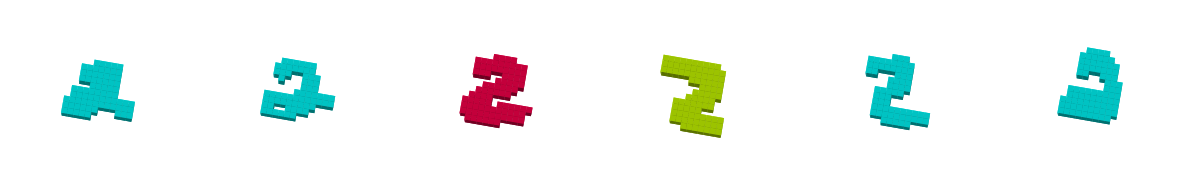

In [15]:
from src.utils import plot3d_static_batch

plot3d_static_batch(sample_x)


### Perform OT and plot

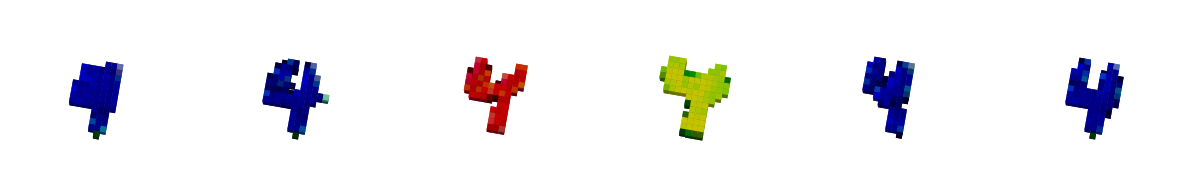

In [20]:
T_x = T(sample_x).detach()
threshold = torch.nn.Threshold(0.2, 0, inplace=False)
T_x = threshold(torch.clip(T_x, min=0, max=1))

plot3d_static_batch(T_x)